# Em qual nicho a empresa deve focar? App ou site? (Aplicando Regressão Linear)

**(Dados fictícios)**

Meu, o negócio é o seguinte: peguei um trampo na XQDL Modas. É uma empresa que vende roupas na net, só que de quebra ainda da umas consultorias em estilo, tipo o programa aquele [Esquadrão da moda](https://www.sbt.com.br/realities/esquadrao-da-moda). Aí os clientes entram na loja, pegam a consultoria e vazam. Porém, aí ta o pulo do gato, os clientes podem encomendar aquela roupa que curtiram, e podem fazer isso por meio do site ou app. 

Aí a XQDL Modas tá tentando decidir se deve concentrar seus esforços (a grana) aplicativos móveis ou em seu site. Eles me contrataram, e você (sim, tu mesmo que tá lendo) vai me ajudar descobrir isso! Vamos começar!


## Imports
**Vamos começar com os imports pandas, numpy, matplotlib,e seaborn. Em seguida, configurar% matplotlib inline.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obter dados (Extract TL)

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Esse CSV tem informações do cliente, como Email, Endereço e cor do Avatar. E ele também possui colunas de valores numéricos:

* **Avg. Session Length**: Tempo médio das sessões de consultoria de estilo na loja.
* **Time on App**: tempo médio gasto no app em minutos.
* **Time on Website**: tempo médio gasto no site em minutos.
* **Lenght of Membership**: Há quantos anos o cliente é membro.

Vamos ler esse csv, padraozim

In [2]:
df = pd.read_csv("Ecommerce Customers")

**Vamos dar aquela bizoiada nos dados com os métodos `head()`, `info()` e `describe()`.**

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análise de dados exploratória

**Vamos dar uma explorada nos dados!**
___
Vamos começar criando um heatmap pra visualizar as correlações.

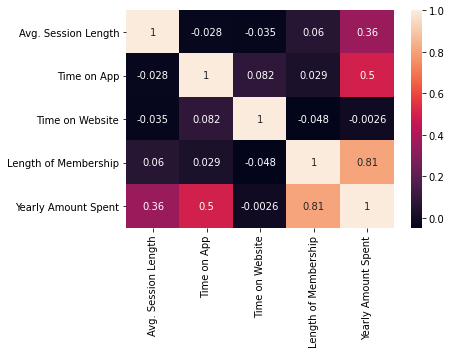

In [9]:
sns.heatmap(df.corr(), annot=True)

E vamos ver um jointplot para comparar as colunas 'Time On Website' (tempo gasto no site) e 'Yearly Amount Spent' (Quanto o cliente gasta no ano). Pra ver se as correlações faz sentido.

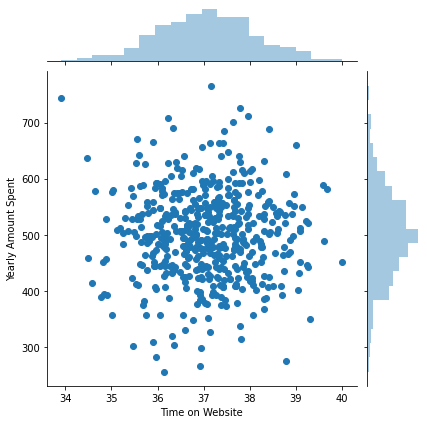

In [10]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df)

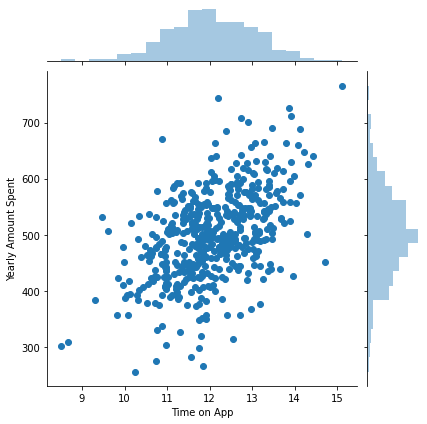

In [11]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df)

Essa sim, parece ter uma relação linear. Conforme o tempo no app aumenta, o Volume anual também. O que explica a correlação de 0.5.

-----
Agora vamos dar uma enfeitada, e fazer um jointplot mas com lote de caixa hexagonal 2d, comparando o 'Time on App' e o 'Length of Membership' (tempo de associado). Isso pra ver se pessoas que são clientes a mais tempo, usam mais o app.

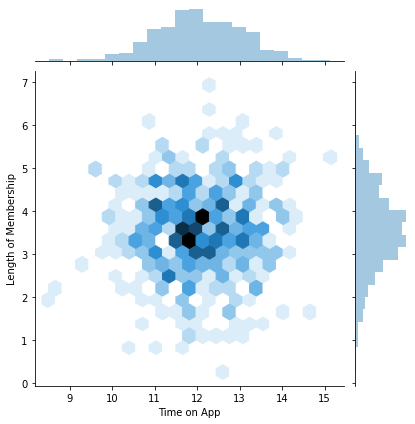

In [16]:
sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex')

Vamos olhar para todas as variáveis, pra ver se alguma "explica" uma relação com o quanto um cliente gasta ao ano. Pra isso, vamos de `pairplot()`.

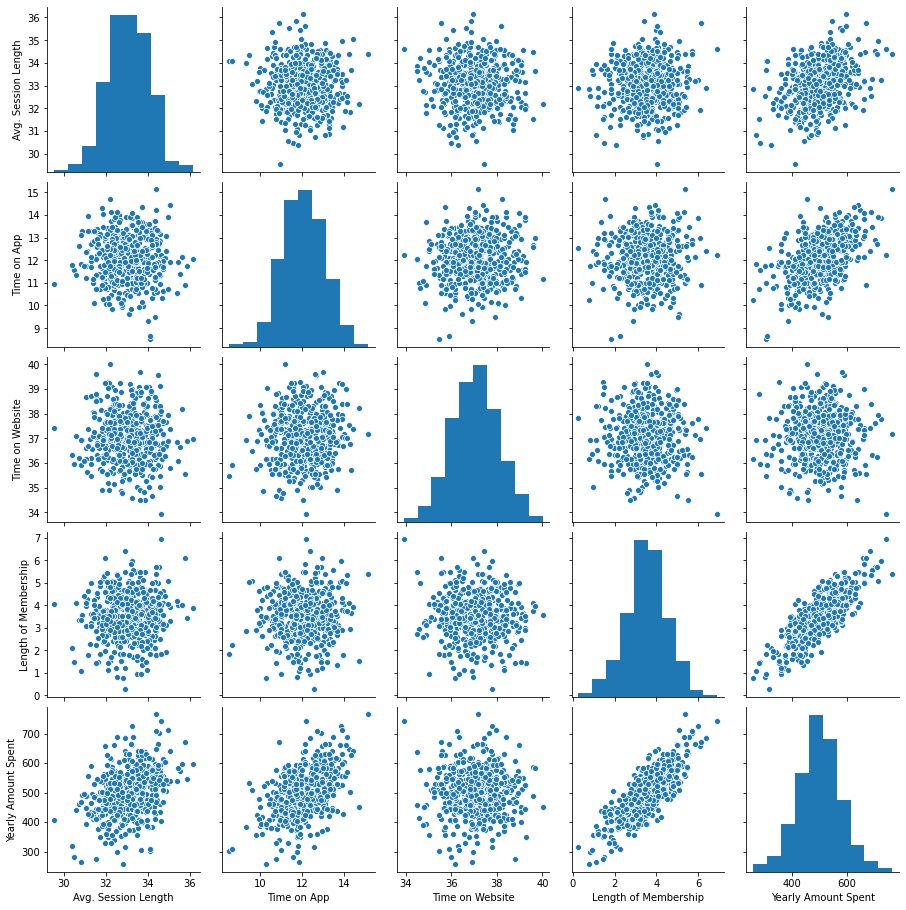

In [17]:
sns.pairplot(df)

Bom, e baseado nisso, 'Lenght of Membership' parece ter a maior ligação. Mas como queremos saber se é mais por app ou site, o tempo no app parece ter mais correlação do que o tempo no site.

----

Agora vamos criar um plot de um modelo linear (usando o `lmplot()` do Seaborn) da quantia anual gasta ('Yearly Amount Spent') vs. tempo de associação ('Length of Membership')

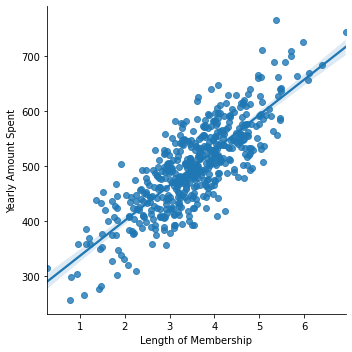

In [18]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

## Treinando e testando os dados

Agora que já demos uma boa olhada, e entendemos que pode haver uma relação linear entre elas. É hora de começar a desenhar nosso modelo de Machine Learning.


Pra isso, vamos começar definindo a nossa variável X (entrada), como sendo todas essas características numéricas, e o nosso y (saída esperada) como sendo a coluna 'Yearly Amount Spent' (Valor anual gasto).


In [23]:
X = df.drop(['Email', 'Address', 'Avatar', 'Yearly Amount Spent'], axis=1) # removendo os q eu nao quero

In [26]:
y = df.filter(['Yearly Amount Spent']) # selecionando o q eu quero

Agora vamos definir os nossos dados em [treino e teste](https://didatica.tech/dados-de-treino-e-teste/). 

Pra isso, tem o tal do `model_selection.train_test_split` do sklearn. É uma mão na roda mesmo.

Vamos definir o test_size = 0.3 e random_state = 101

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=101)

## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!
BIIRRRLLL

<img src='hora_do_show.gif'>

---- 
Primeiro carregamos o menino da sklearn

In [31]:
from sklearn.linear_model import LinearRegression

Criamos uma instância de um modelo `LinearRegression()` e vamos apelidadar de lm

In [32]:
lm = LinearRegression()

Vamos passar os dados de treino pra 'lm' com o `fit()`.

In [33]:
lm.fit(X_train, y_train)

LinearRegression()

Vamos ver os coeficientes do modelo

In [48]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

## Previsão de dados de teste
E agora que o Monstro saiu da jaula, é hora de ver se ele derruba as árvores do parque Ibirapuera mesmo: É hora de testar, pra ver se ele consegue prever com os dados de teste.

Pra isso, vamos usar o `lm.predict()` para prever o conjunto X_test dos dados (que foi dividido lá pelo `train_test_split()`)

Esse método pede só um valor, pois ele justamente tenta encontrar os valores de y :D

In [36]:
prediction = lm.predict(X_test)

Vamos visualizar os músculos: Verificar se ele preveu bem, ou se foi tudo torto (deve continuar na reta, já que é uma regressão linear).

Text(0, 0.5, 'Predicted Y')

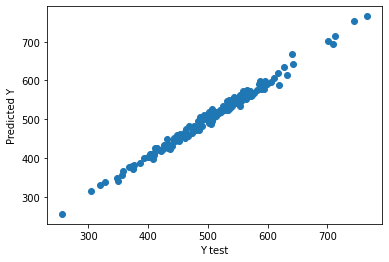

In [37]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

## Avaliando o Modelo

Agora vamos avaliar se foi músculo ou água com músculo: vamos verificar o desempenho do nosso modelo calculando a soma residual dos quadrados e o score de variância explicado (R ^ 2).

Uns nomes muito loucos, mas é o [erro absoluto médio(MAE)](https://pt.qwe.wiki/wiki/Mean_absolute_error), o [erro quadrático médio (MSE)](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio) e a [raiz do erro médio quadrático (RMSE)](https://pt.qwe.wiki/wiki/Root-mean-square_deviation) 

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626


Os erros foram bem interessantes, errando em média 8.9 do valor do Gasto anual correto.
Mas agora vamos olhar pros errinhos, pros 'Resíduos'.

## Resíduos

Vamos explorar rapidamente os resíduos (subtrair o esperado do obtido) para garantir que tudo esteja bem com os nossos dados. Traçando um histograma dos erros, podemos nos certificar de que ele siga uma distribuição normal (normalmente distribuido). Podemos usar o `distplot()` pra isso (Se seguir uma normal, então acetamos o modelo).


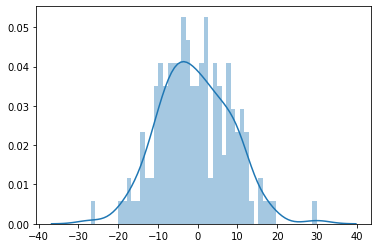

In [46]:
sns.distplot((y_test-prediction), bins=50)

## Conclusão

Blz, rodou o modelo que foi uma beleza! Mas ainda não respondemos à pergunta original, é pra XQDL Modas focar no desenvolvimento de app mobile ou de sites? Ou será que no fundo isso nem importa? E na real o tempo como membro é o que é realmente importa? 

Vamos analisar os coeficientes do modelo pra responder isso.

In [51]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [52]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

In [57]:
coefs = pd.DataFrame(lm.coef_[0], X.columns, columns=['Coefs'])
coefs

,Coefs
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Bom, de acordo com os coeficientes, vemos que a cada 1 incremento na unidade de 'Avg. Session Length', ou seja, a cada minuto (em média) a mais que o cliente passa logado, tem o acrescimo de $25.98 dolares no valor total gasto ao ano.

No tempo gasto no App, vemos que esse valor vai para $38.59 dolares por minuto acrescido. No site, esse valor é só a capa da gaita,  $0.19.

E o aumento de 1 ano no tempo em que a pessoa é cliente da XQDL Modas, tem um acréscimo médio de  $61.27 no gasto anual dela.

**Respondendo a pergunta:**
A empresa deve, primeiramente **encontrar formas de fidelizar (engajar) o cliente**. Já no tradeoff entre app ou site, foi mostrado que a atenção no **Aplicativo móvel** faz muito mais sentido do que gastar tempo e dinheiro investindo no Website.

----

Era isso! Esse foi um teste para utilizarmos nossas técnicas aprendidas de visualização e carregamento de dados. E para fazer a primeira predição utilizando um modelo Linear.

(Esse notebook foi baseado no curso Python para Data Science e Machine Learning - COMPLETO).